In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [106]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

In [107]:
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), download_if_missing=True)
texts = data.data
labels = data.target
target_names = data.target_names

In [108]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=5)
X_tfidf = vectorizer.fit_transform(texts)
print("TF-IDF Shape:", X_tfidf.shape)

TF-IDF Shape: (18846, 24164)


In [109]:
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
print("After SVD Shape:", X_svd.shape)

After SVD Shape: (18846, 2)


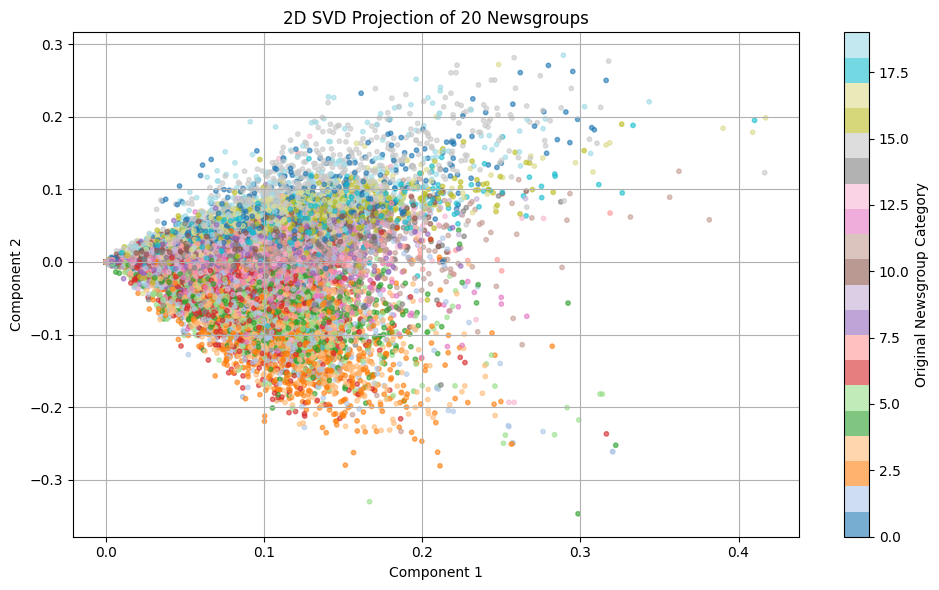

In [110]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='tab20', s=10, alpha=0.6)
plt.title("2D SVD Projection of 20 Newsgroups")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(scatter, label="Original Newsgroup Category")
plt.grid(True)
plt.tight_layout()
plt.show()

In [111]:
kmeans = KMeans(n_clusters=20, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_svd)
sil_score = silhouette_score(X_svd, cluster_labels)
print("Silhouette Score (k=20):", sil_score)

Silhouette Score (k=20): 0.34261225416691815


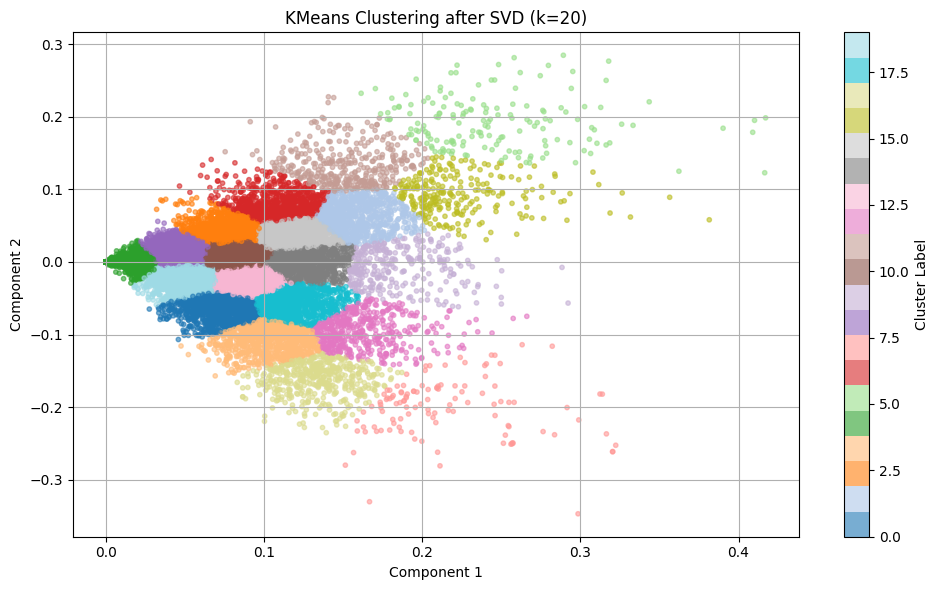

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=cluster_labels, cmap='tab20', s=10, alpha=0.6)
plt.title("KMeans Clustering after SVD (k=20)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.tight_layout()
plt.show()